In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [2]:
data = pd.read_csv('bike-sharing/day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
#以下是使用共享单车人数随月份的变化
monthsToCnt = dict()
daysAMonth = [31,28,31,30,31,30,31,31,30,31,30,31,31,29,31,30,31,30,31,31,30,31,30,31]
months = 1
days = 0
for index,rows in data.iterrows():
    days = days +  1
    if months in monthsToCnt.keys():
        monthsToCnt[months] += rows['cnt'] 
    else:
        monthsToCnt[months] = rows['cnt']
        # print(monthsToCnt)
    if  months != 24 and days == daysAMonth[months-1]:
        days = 0
        months = months +1

monthsToCnt


{1: 38189,
 2: 48215,
 3: 64045,
 4: 94870,
 5: 135821,
 6: 143512,
 7: 141341,
 8: 136691,
 9: 127418,
 10: 123511,
 11: 102167,
 12: 87323,
 13: 96744,
 14: 103137,
 15: 164875,
 16: 174224,
 17: 195865,
 18: 202830,
 19: 203607,
 20: 214503,
 21: 218573,
 22: 198841,
 23: 152664,
 24: 123713}

In [19]:
monthsDetail=['2011.1','2011.2','2011.3','2011.4','2011.5','2011.6','2011.7','2011.8','2011.9','2011.10','2011.11','2011.12',
'2012.1','2012.2','2012.3','2012.4','2012.5','2012.6','2012.7','2012.8','2012.9','2012.10','2012.11','2012.12'
]
countsInMonths = dict()

for i in range(1,25):
    countsInMonths[monthsDetail[i-1]] = monthsToCnt[i]

countsInMonths

{'2011.1': 38189,
 '2011.2': 48215,
 '2011.3': 64045,
 '2011.4': 94870,
 '2011.5': 135821,
 '2011.6': 143512,
 '2011.7': 141341,
 '2011.8': 136691,
 '2011.9': 127418,
 '2011.10': 123511,
 '2011.11': 102167,
 '2011.12': 87323,
 '2012.1': 96744,
 '2012.2': 103137,
 '2012.3': 164875,
 '2012.4': 174224,
 '2012.5': 195865,
 '2012.6': 202830,
 '2012.7': 203607,
 '2012.8': 214503,
 '2012.9': 218573,
 '2012.10': 198841,
 '2012.11': 152664,
 '2012.12': 123713}

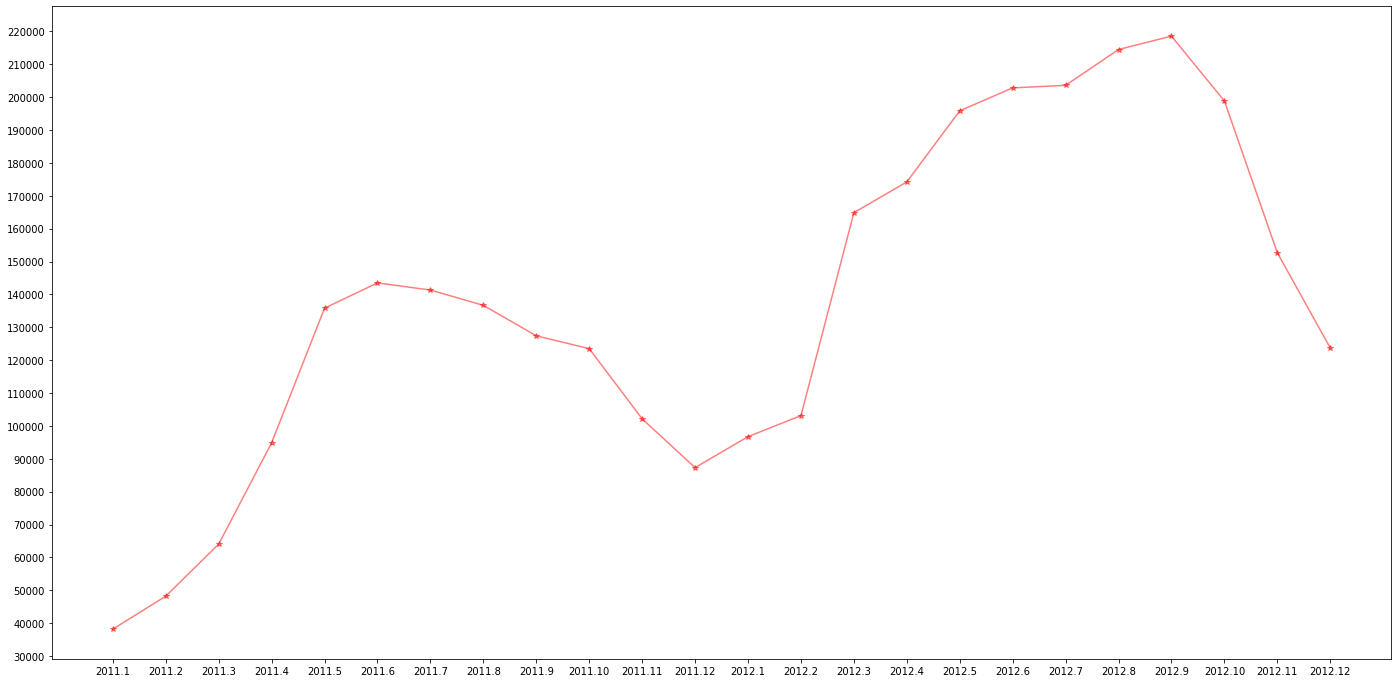

In [39]:
fig=plt.figure(figsize=(24,12))
plt.plot(countsInMonths.keys(),countsInMonths.values(),linestyle='-',marker='*',c='r',alpha=0.5)#作图

ax=plt.gca()
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10000))

fig.savefig('output/counts-months.svg',format='svg',dpi=150)#输出